In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
x = np.random.random((1000,))*10

lineCoeffs = np.array([1, 4.5])

pv = 0.85

weirdNoise = np.array([(np.random.random())*15 if np.random.random() < pv else 0. for _ in range(x.shape[0])])
y = lineCoeffs[0]*x + lineCoeffs[1] + np.random.normal(0, 1, x.shape) + weirdNoise



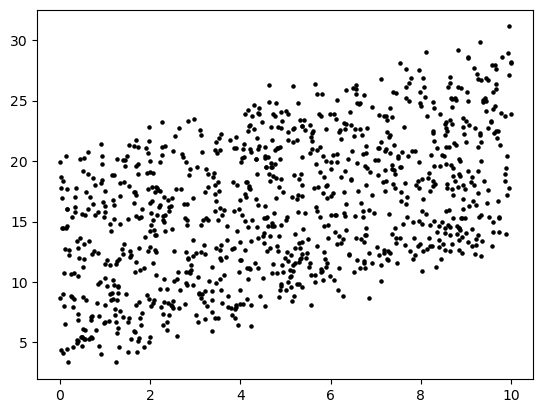

In [3]:
plt.scatter(x, y, s = 1, c='black')

Проведём прямую

In [4]:
from sklearn.linear_model import LinearRegression, Ridge

In [5]:
x = [[x[i]] for i in range(len(x))]

In [6]:
regressor = RANSACRegressor().fit(x, y)
y_predicted = regressor.predict(x)

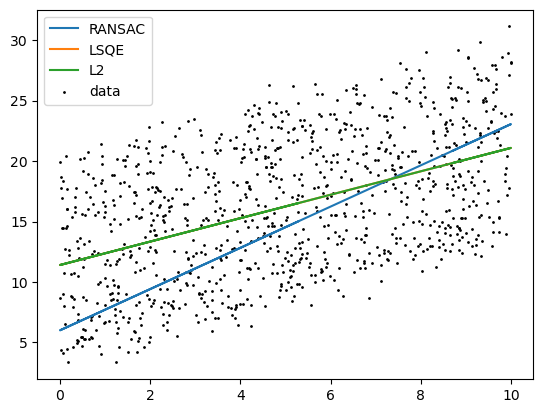

In [9]:
plt.scatter(x, y, s=1, label='data', c='black')
plt.plot(x, y_predicted, label='RANSAC')
plt.plot(x, LinearRegression().fit(x,y).predict(x), label='LSQE')
plt.plot(x, Ridge().fit(x,y).predict(x), label='L2')
plt.legend()